# Finite Volume Method with ENO Reconstruction

GaussLegendre{Float64}: Nodal Gauss Legendre basis of degree 0
  0.000296 seconds (155 allocations: 15.625 KiB)



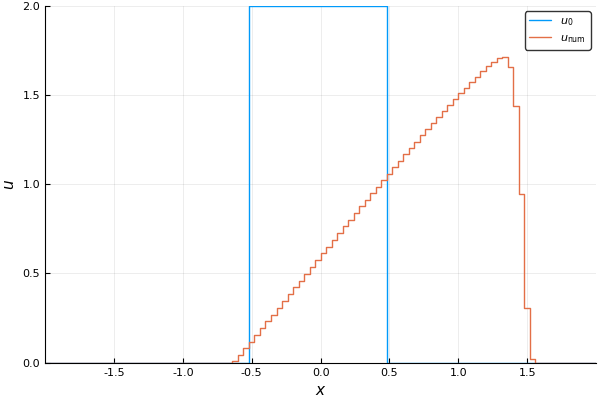

In [11]:
using Revise
using HyperbolicDiffEq
using OrdinaryDiffEq, DiffEqCallbacks
using LaTeXStrings, Plots; pyplot()

xmin, xmax = -2., 2.
N = 10^2
parallel = Val{:serial}()
#parallel = Val{:threads}()

balance_law = Burgers()
fnum = LocalLaxFriedrichsFlux()
reconstruction = ModifiedENO(Val{1}(), ClassicalChoiceENO())

# set up a periodic problem
u_ana = solve(RiemannProblem(balance_law, 0., 1., -0.5) * RiemannProblem(balance_law, 1., 0., 0.5))
tspan = (0., 1.)
u₀func(x) = u_ana(tspan[1], x)

# create an ODE
mesh = UniformPeriodicMesh1D(xmin, xmax, N)
fv = UniformPeriodicReconstructedFV1D(balance_law, mesh, fnum, reconstruction, parallel)
ode = semidiscretise(fv, u₀func, tspan)

# solve the ODE using a fixed time step
@time sol = solve(ode, SSPRK104(), dt=4*max_dt(tspan[1], ode.u0, fv), save_everystep=false)


plot(xguide=L"x", yguide=L"u")
plot!(evaluate_coefficients(sol[1], mesh), label=L"u_0")
plot!(evaluate_coefficients(sol[end], mesh), label=L"u_\mathrm{num}")
#x = linspace(xmin, xmax, 10^3)
#plot!(x, u_ana.(tspan[end], x), label=L"u_\mathrm{ana}", legend=true)


  0.002700 seconds (301.36 k allocations: 5.377 MiB)



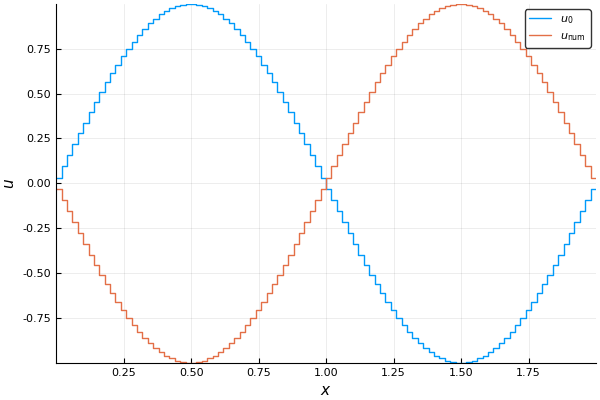

In [21]:
using Revise
using HyperbolicDiffEq
using OrdinaryDiffEq, DiffEqCallbacks
using LaTeXStrings, Plots; pyplot()

xmin, xmax = 0., 2.
N = 10^2
parallel = Val{:serial}()
#parallel = Val{:threads}()

balance_law = ConstantLinearAdvection()
fnum = LocalLaxFriedrichsFlux()
#reconstruction = ModifiedENO(Val{8}(), ClassicalChoiceENO())
reconstruction = ModifiedENO(6)

# set up a periodic problem
u_ana(t,x) = sinpi(x-t)
tspan = (0., 1.)
u₀func(x) = u_ana(tspan[1], x)

# create an ODE
mesh = UniformPeriodicMesh1D(xmin, xmax, N)
fv = UniformPeriodicReconstructedFV1D(balance_law, mesh, fnum, reconstruction, parallel)
ode = semidiscretise(fv, u₀func, tspan)

# solve the ODE using a fixed time step
@time sol = solve(ode, SSPRK104(), dt=4*max_dt(tspan[1], ode.u0, fv), save_everystep=false)


plot(xguide=L"x", yguide=L"u")
plot!(evaluate_coefficients(sol[1], mesh), label=L"u_0")
plot!(evaluate_coefficients(sol[end], mesh), label=L"u_\mathrm{num}")
#x = linspace(xmin, xmax, 10^3)
#plot!(x, u_ana.(tspan[end], x), label=L"u_\mathrm{ana}", legend=true)
